 The initial image has been convolved with a Gaussian of Sigma 0.5 .... 
 Now the Gaussian Blurred Images are being obtained ....
 The Convolution with Gaussians at different scales is over .... Now displaying all the images... In increasing order of sigma used for convolution
 Now the DoG Images are being calculated. They are displayed below
 The DoG Images have been displayed
 Now we are detecting Keypoints
 Key Points detected... After Orientation Assignment, they will be displayed
 The orientation are being assigned here....
 Sift Descriptor under computation here
 Normalinsed Sift Descriptor with Max Value set to 0.2 is computed
 Now, we will try to match two images....


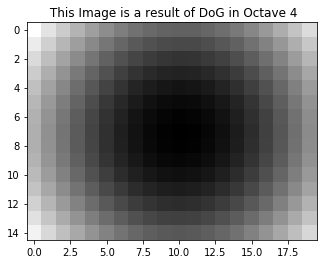

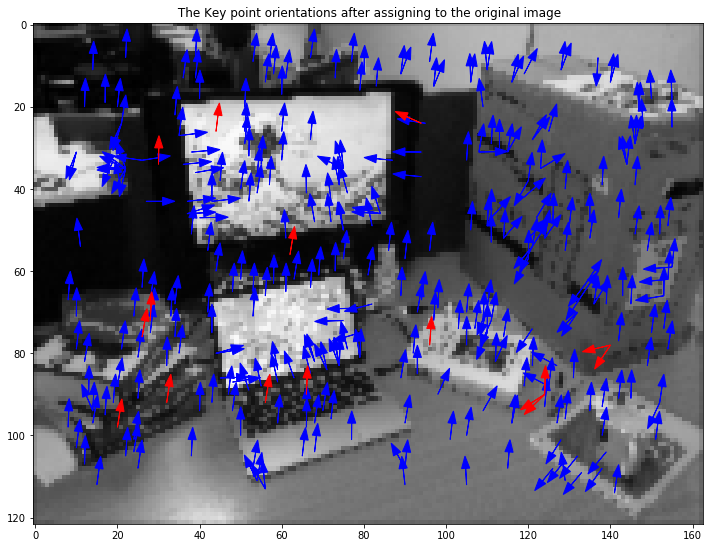

In [8]:
## Importing Standard Functions 
#---------------------------------------------------------------------------- This part of the code is for function declaration and for importing libraries-----------------------------------------------------------
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rd
## Defining the Gaussian Function

def gaussian(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*sigma**2)))

## Defining the Convolution Function
def convolution(image, sigma):
    temp = 0
    final_image = np.zeros(image.shape)
    if (int(6*sigma)%2)==0:
        filter_size = int(6*sigma)+1
    else:
        filter_size = int(6*sigma)+2
    offset = int(filter_size)//2
    shap = (image.shape[0]+2*offset, image.shape[1]+2*offset)
    filter_ = np.zeros((filter_size, filter_size))
    for i in range(filter_size):
        for j in range(filter_size):
            filter_[i][j] = gaussian(i-offset, j-offset, sigma)
    
    ## Normalizing the Filter
    ## Filter Size is set to 6 times Sigma
    
    sum_filter = 0
    for i in range(filter_size):
        for j in range(filter_size):
            sum_filter+=filter_[i][j]
    filter_=filter_/(sum_filter)
    temp = 0
    img = np.zeros(shap)
    for i in range(offset,shap[0]-offset):
        for j in range(offset, shap[1]-offset):
            img[i][j]  = image[i-offset][j-offset]
    for i1 in range(offset,shap[0]-offset):
        for i2 in range(offset,shap[1]-offset):
            for i in range(filter_size):
                for j in range(filter_size):
                    temp+= img[i1-offset+i][i2-offset+j]*filter_[i][j]
            final_image[i1-offset][i2-offset] = temp
            temp = 0 
    return final_image

## Defining the Function for Finding Out Keypoints
def keypoint(image_1, image_2, image_3):
    temp = image_1.shape
    keypt = []
    for i in range(1, temp[0]-1):
        for j in range(1, temp[1]-1):
        	## Comparison with 26 other neighbors
            min1=min(image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            max1=max(image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            min2=min(image_3[i,j],image_3[i-1,j-1], image_3[i-1,j], image_3[i-1,j+1], image_3[i,j-1], image_3[i,j+1],image_3[i+1,j-1],image_3[i+1,j],image_3[i+1][j+1])
            max2=max(image_3[i,j],image_3[i-1,j-1], image_3[i-1,j], image_3[i-1,j+1], image_3[i,j-1], image_3[i,j+1],image_3[i+1,j-1],image_3[i+1,j],image_3[i+1][j+1])
            min3=min(image_1[i,j],image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            max3=max(image_1[i,j],image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            ## These both conditions are mutually exclusive cases
            if image_2[i,j] <=min(min1, min2, min3):
                keypt.append([i,j])
            if image_2[i,j]>=max(max1, max2, max3):
                keypt.append([i,j])
    return keypt

## Keypoint Detection for the topmost and the bottommost layers 
## Even though detected, it is not used in the final descriptor part
def keypoint_top_bottom(image_1, image_2):
    temp = image_1.shape
    keypt = []
    for i in range(1, temp[0]-1):
        for j in range(1, temp[1]-1):
        	# Comparison with 26 other neighbors
            min1=min(image_2[i,j],image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            max1=max(image_2[i,j],image_2[i-1,j-1], image_2[i-1,j], image_2[i-1,j+1], image_2[i,j-1], image_2[i,j+1],image_2[i+1,j-1],image_2[i+1,j],image_2[i+1][j+1])
            min2=min(image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            max2=max(image_1[i-1,j-1], image_1[i-1,j], image_1[i-1,j+1], image_1[i,j-1], image_1[i,j+1],image_1[i+1,j-1],image_1[i+1,j],image_1[i+1][j+1])
            if(image_1[i,j]<=min(min1,min2,max1,min2)):
                keypt.append([i,j])
            if(image_1[i,j]>=max(min1,min2,max1,max2)):
                keypt.append([i,j])
    return keypt

## Defining the Function for the computation of the Difference of the Gaussians - Input is already two Gaussian Convolved Images
def diff_of_gauss(image1, image2):
    image3 = np.zeros((image1.shape[0],image1.shape[1]))
    for i in range(image1.shape[0]):
        for j in range(image1.shape[1]):
            image3[i,j] = image1[i,j]-image2[i,j]
    return image3

## Orientation Assignment for a Keypoint

## This returns a bucket that has Keypoint and the Correspoing buckets that we build
## We need to show the orientation - Done Later
def orientation_assignment(octave_number, image_number):
    hist = {}
    image = image_generated[octave_number-1][image_number-1]
    ## We are choosing the image from the Gaussian Scale Space
    ## Image Generated is in Gaussian Scale Space and 
    ## Image_generated_dog is in Difference of Gaussian Scale Space
    sigma = octaves[octave_number-1][image_number-1]*1.5
    ## Smpoothing as per algorithm before orientation assignment
    image = convolution(image, sigma)
    index1 = octave_number - 1
    index2 = image_number - 1
    x__ = image.shape[0]
    y__ = image.shape[1]
    angle = {}
    magnitude = {}
    for i in range(len(kplist[index1][index2])):
        x,y = kplist[index1][index2][i][0],kplist[index1][index2][i][1]
        if x+8<=x__ and y+8<=y__ and x-8>=0 and y-8>=0: ## Ensuring that corner keypoints are eliminated - We wont have a 16x16 neighborhood for them
            for i1 in range(-8,9):
                for j1 in range(-8,9):
                        try:
                            xcoord = image[x+i1,y+j1+1]-image[x+i1,y+j1-1]
                            ycoord = image[x+1+i1,y+j1]-image[x-1+i1,y+j1]

                            ## Assignment of Angles is done here
                            if xcoord<0 and ycoord>0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/(image[x+i1,y+1+j1] - image[x+i1,y+j1-1])) + 180
                            if xcoord>0 and ycoord>0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/image[x+i1,y+1+j1] - image[x+i1,y+j1-1])
                            if xcoord>0 and ycoord<0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/(image[x+i1,y+1+j1] - image[x+i1,y+j1-1])) + 360
                            if xcoord<0 and ycoord<0:
                                angle[(x+i1,y+j1)] = 180/math.pi*math.atan((image[x+1+i1, y+j1] - image[x-1+i1,y+j1])/(image[x+i1,y+1+j1] - image[x+i1,y+j1-1])) + 180
                            if xcoord ==0 and ycoord!=0:
                                if ycoord<0:
                                    angle[(x+i1,y+j1)] = 270
                                else:
                                    angle[(x+i1,y+j1)] = 90
                            if xcoord!=0 and ycoord ==0:
                                if xcoord<0:
                                    angle[(x+i1,y+j1)] = +180
                                if xcoord>0:
                                    angle[(x+i1,y+j1)] = 0
                            magnitude[(x+i1,y+j1)] = ((image[x+i1+1,y+j1]-image[x-1+i1,y+j1])**2 + (image[x+i1,y+j1+1] - image[x+i1,y+j1-1])**2)**0.5
                        except:
                            continue
        else:
            continue
        hist[(x,y)] = [ [] for j_ in range(36)] ## 36 bins
        for i_ in angle:
            temp = angle[i_]//(10)
            hist[(x,y)][(int(temp))].append(magnitude[i_])
        angle = {}

    for elem in hist:
        for j in range(len(hist[elem])):
            hist[elem][j] = sum(hist[elem][j])
    ## We are choosing the most prominent one(s) to be our orientation(s).
    max_list = {}
    for i in hist:
        max_hist = [0,-1]
        for j in range(len(hist[i])):
            if hist[i][j]>max_hist[1]:
                max_hist = [j,hist[i][j]]

        max_list[i] = [max_hist]
        for j in range(len(hist[i])):
            if hist[i][j]>=0.8*max_hist[1] and [j,hist[i][j]] not in max_list[i]:
                max_list[i].append([j,hist[i][j]])
    return max_list

## Final SIFT Descriptor without Normalizing
## This returns Lists of Lists that is eventually dealt with later
def sift_descriptor(image, orientation):
    
    ## Computing the orientations --- 
    
    total_bin = {}
    hist = {}
    for i in orientation:
        magnitude = {}
        angle = {}
        for j in range(i[0]-8,i[0]+9):
            for k in range(i[1]-8,i[1]+9):
                if j!=i[0] and k!=i[1]:
                    try:
                        xcoord = image[j,k+1]-image[j,k-1]
                        ycoord = image[j+1,k]-image[j-1,k]

                        if xcoord<0 and ycoord>0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1])) + 180

                        if xcoord>0 and ycoord>0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1])) 

                        if xcoord<0 and ycoord<0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1]))  + 180

                        if xcoord>0 and ycoord<0:
                            angle[(j,k)] = 180/math.pi*math.atan((image[j+1,k] - image[j-1,k])/(image[j,k+1] - image[j,k-1]))  + 360

                        if xcoord ==0 and ycoord!=0:
                            if ycoord<0:
                                angle[(j,k)] = 270
                            else:
                                angle[(j,k)] = 90

                        if xcoord!=0 and ycoord ==0:
                            if xcoord<0:
                                angle[(j,k)] = 180
                            if xcoord>0:
                                angle[(j,k)] = 0
                        magnitude[(j,k)] = ((image[j+1,k]-image[j-1,k])**2 + (image[j,k+1] - image[j,k-1])**2)**0.5
                    except:
                        continue
                else:
                    continue
        sigma = 8 
        
        # One half of the descriptor window of 16,
        # Taking a 17 x 17 neighborhood
        # Sigma is set to 8, because it has to be half the width of the Histogram Width
        gauss_8 = np.zeros((17,17))
        gauss_sum = 0
        for i_ in range(17):
            for j in range(17):
                gauss_8[i_][j] = gaussian(i_-8,j-8,sigma)
                gauss_sum+=gauss_8[i_][j]
        gauss_8 = gauss_8/gauss_sum
        # Normalized Gaussian
        ## Weighing the image before making the orientations
        
        for x in range(i[0]-8,i[0]+8):
            for y in range(i[1]+8,i[1]+8):
                magnitude[(x,y)]*=gauss_8[x-i[0]+8][y+8-i[1]]
        ## Initializing the 128 long vector in terms of 16 elements of a list, with each containing 8 elements
        bins = [[[] for ___ in range(8)] for __ in range(16)]
        ## The below functions map our 16x16 neighborhood ( 256) pixels under consideration. 
        try:
            for i3 in range(-8,-4,1):
                for j in range(-8,-4,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[0][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[1][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[2][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[3][temp].append(magnitude[(i[0]+i3,i[1]+j)])


            for i3 in range(-4,0,1):
                for j in range(-8,-4,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[4][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[5][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[6][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[7][temp].append(magnitude[(i[0]+i3,i[1]+j)])

            for i3 in range(1,5,1):
                for j in range(-8,-4,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[8][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[9][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[10][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[11][temp].append(magnitude[(i[0]+i3,i[1]+j)])

            for i3 in range(5,9,1):
                for j in range(-8,-4,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[12][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(-4,0,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[13][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(1,5,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[14][temp].append(magnitude[(i[0]+i3,i[1]+j)])
                for j in range(5,9,1):
                    temp = angle[(i[0]+i3,i[1]+j)]//45
                    temp = int(temp)
                    bins[15][temp].append(magnitude[(i[0]+i3,i[1]+j)])  
        except:
            continue
        total_bin[(i[0],i[1])] = bins
        del angle 
        del magnitude
    return total_bin
 #----------------------------------------------------------------------------This is the code part of the program where all the initialization occurs -----------------------------------------------------------            
## Initial Declaration of all the Sigma's
## I have taken 4 octaves, each with 5 different sigmas
sigma = 1/(2**0.5)
k = 2**0.5
octave1 = []
octave2 = []
octave3 = []
octave4 = []
temp = sigma
for i in range(5):
    octave1.append(temp)
    temp = temp*k
    
temp = octave1[2]
for i in range(5):
    octave2.append(temp)
    temp = temp*k
temp = octave2[2]
for i in range(5):
    octave3.append(temp)
    temp = temp*k
temp = octave3[2]
for i in range(5):
    octave4.append(temp)
    temp = temp*k

octaves = [octave1, octave2, octave3, octave4]

 #---------------------------------------------------------------------------- Input Image is read and the processing begins here  -----------------------------------------------------------            
image_1 = cv.imread('img1.jpg')
image_1 = cv.resize(image_1,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
image_1 = convolution(image_1, 0.5)
print(' The initial image has been convolved with a Gaussian of Sigma 0.5 .... ')
print(' Now the Gaussian Blurred Images are being obtained ....')
##  Image is initally convolved so that we reduce the noise

## Images are Generated - The Gaussian Scale Space Images - They are generated here
image_generated = []
for i in range(1,5):
    image_generated.append([])
    for j in octaves[i-1]:
        img_ = convolution(image_1, j)
        image_generated[i-1].append(img_)
    image_1 = cv.resize(image_1,None, fx = 0.5, fy =  0.5, interpolation = cv.INTER_CUBIC)
print(' The Convolution with Gaussians at different scales is over .... Now displaying all the images... In increasing order of sigma used for convolution')
for i in range(len(image_generated)):
	for j in range(len(image_generated[0])):
		plt.imshow(image_generated[i][j],cmap = 'gray')
		plt.title(' This Image is in Octave'+ str(i+1) )
		#plt.show()
## Generating all the Difference of Gaussian Images heree
print(' Now the DoG Images are being calculated. They are displayed below')
image_generated_dog = []
for i in range(len(image_generated)):
    image_generated_dog.append([])
    for j in range(len(image_generated[i])):
        try:
            temp = diff_of_gauss(image_generated[i][j+1], image_generated[i][j]) ## The One in i,j+1 has higher sigma value
            image_generated_dog[i].append(temp)
        except:
            continue
for i in range(len(image_generated)):
	for j in range(len(image_generated_dog[0])):
		plt.imshow(image_generated_dog[i][j],cmap = 'gray')
		plt.title(' This Image is a result of DoG in Octave '+ str(i+1) )
		#plt.show()
print(' The DoG Images have been displayed')
print(' Now we are detecting Keypoints')

## Initialisation of the Key Point List
kplist= [[],[],[],[]]

## Generating all the Keypoints from the DoG Images

for i in range(len(image_generated_dog)):
    kplist[i].append(keypoint_top_bottom(image_generated_dog[i][0],image_generated_dog[i][1]))
    
for i in range(len(image_generated_dog)):
    for j in range(len(image_generated_dog[i])):
        try:
            kplist[i].append(keypoint(image_generated_dog[i][j],image_generated_dog[i][j+1],image_generated_dog[i][j+2]))
        except:
            continue

for i in range(len(image_generated_dog)):
    kplist[i].append(keypoint_top_bottom(image_generated_dog[i][2],image_generated_dog[i][3]))

print(' Key Points detected... After Orientation Assignment, they will be displayed')
print(' The orientation are being assigned here....')

## Assigning the Orientation to all the images
## This is done in the Gaussian Scale Space. 
orientation_final = {}
for i in range(1,len(image_generated_dog)+1):
    for j in range(1,len(image_generated_dog[0])+1):
        orientation_final[(i,j)] = orientation_assignment(i,j)
## For every image, I am taking the DoG from which subtraction happens here
#---------------------------------------------------------------------------- This part of the code outputs the Oriented Vectors on our Image -----------------------------------------------------------
image_1 = cv.imread('img1.jpg')
image_1 = cv.resize(image_1,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
image_1 = convolution(image_1, 0.5)
plt.figure(figsize=(12,12))
plt.imshow(image_1,cmap='gray')
plt.title(' The Key point orientations after assigning to the original image')
for elem in orientation_final:
    if elem[1]!=1 and elem[1]!=4:
        if elem[0]==1:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow1 = plt.arrow(x=i[1],y=i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width = 2,color ='b',label = 'Octave 1')
                    #plt.legend([arrow1,],['Octave 1'])
        if elem[0]==2:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow2 = plt.arrow(x=2*i[1],y=2*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color='r',label = 'Octave 2')
                    #plt.legend([arrow2,],['Octave 2'])
        if elem[0]==3:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow3 = plt.arrow(x=4*i[1],y=4*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color = 'c',label = 'Octave 3')
                    #plt.legend([arrow3,],['Octave 3'])
        if elem[0]==4:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow4 = plt.arrow(x=8*i[1],y=8*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color='y',label = 'Octave 4')
                    plt.legend([arrow1,arrow2,arrow3,arrow4],['Octave 1','Octave 2','Octave 3','Octave 4'])
#plt.show()
#---------------------------------------------------------------------------- Assignment of Final Descriptor follows below -----------------------------------------------------------
print(' Sift Descriptor under computation here')
import math
## SIFT Descriptor - I am excluding the topmost and bottommost ones
sift_final = {}
for i in range(4):
    for j in range(4):
        if j!=0 and j!=3:
            try:
                sift_final[(i,j)] = sift_descriptor(image_generated[i][j],orientation_final[i+1,j+1])
            except:
                continue

## Final Descripter creation from the sift_descriptor() function
for i in sift_final:
	for j in sift_final[i]:
		for k in range(len(sift_final[i][j])):
			for l in range(len(sift_final[i][j][k])):
				sift_final[i][j][k][l] = sum(sift_final[i][j][k][l])
### Here we are making the bins, after they are returned as a dictionary by the descriptor function
final_descriptor = {}
for i in sift_final:
    for j in sift_final[i]:
        final_descriptor[j] = []
        for k in sift_final[i][j]:
            final_descriptor[j].append(k)

# I am creating the final descriptor here
for i in final_descriptor:
    arr_ = np.asarray(final_descriptor[i])
    arr_ = arr_.flatten()
    final_descriptor[i] = arr_

# Now Normalise the Final Descriptor

for i in final_descriptor:
	sum_ = 0
	for j in final_descriptor[i]:
		sum_+=j
	final_descriptor[i] = final_descriptor[i]/sum_

# Now set the maximum value of the descriptor to 0.2   # Again, normalize
for i in final_descriptor:
	max_ = 0
	for j in final_descriptor[i]:
		max_ = max(max_,j)
	for j in range(len(final_descriptor[i])):
		final_descriptor[i][j] = 0.2*final_descriptor[i][j]/(max_)
## Finally, normalise once more
for i in final_descriptor:
	sum_ = 0
	for j in final_descriptor[i]:
		sum_+=j
	final_descriptor[i] = final_descriptor[i]/sum_
# Now, final descriptor has all the keypoints and the correspoinding 128 Dimensional Vector
#for i in final_descriptor:
#	print(final_descriptor[i])
print(' Normalised Sift Descriptor with Max Value set to 0.2 is computed')
print(' Now, we will try to match two images....')
# ------------------------------------------------------------------- Matching Images ------------------------------------------------------------- #

sigma = 1/(2**0.5)
k = 2**0.5
octave1 = []
octave2 = []
octave3 = []
octave4 = []
temp = sigma
for i in range(5):
    octave1.append(temp)
    temp = temp*k
    
temp = octave1[2]
for i in range(5):
    octave2.append(temp)
    temp = temp*k
temp = octave2[2]
for i in range(5):
    octave3.append(temp)
    temp = temp*k
temp = octave3[2]
for i in range(5):
    octave4.append(temp)
    temp = temp*k

octaves = [octave1, octave2, octave3, octave4]

# ------------------------------------------------------------------- Matching Images ------------------------------------------------------------- #


 The initial image has been convolved with a Gaussian of Sigma 0.5 .... 
 Now the Gaussian Blurred Images are being obtained ....
 The Convolution with Gaussians at different scales is over .... Now displaying all the images... In increasing order of sigma used for convolution
 Now the DoG Images are being calculated. They are displayed below
 The DoG Images have been displayed
 Now we are detecting Keypoints
 Key Points detected... After Orientation Assignment, they will be displayed
 The orientation are being assigned here....


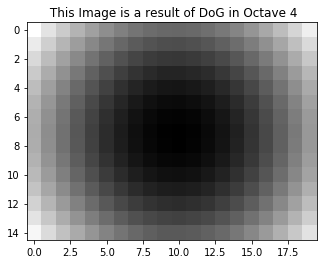

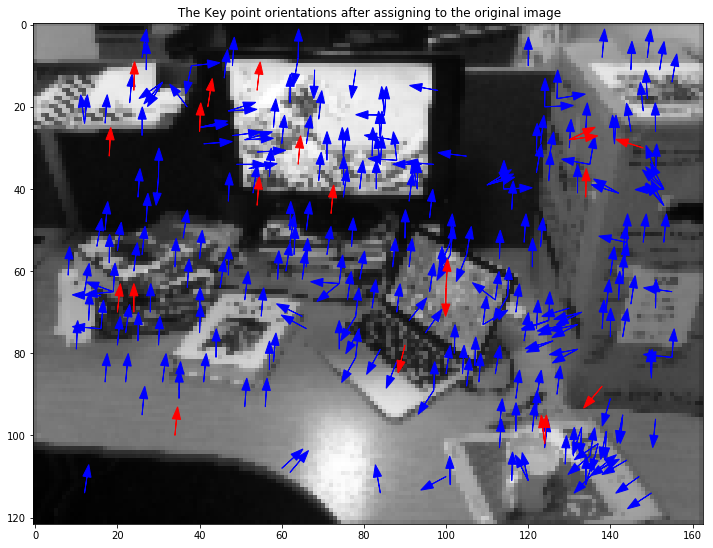

 Sift Descriptor under computation here
 Normalinsed Sift Descriptor with Max Value set to 0.2 is computed
 Now, we will try to match two images....


In [125]:

 #---------------------------------------------------------------------------- Input Image is read and the processing begins here  -----------------------------------------------------------            
image_1 = cv.imread('img2.jpg')
image_1 = cv.resize(image_1,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
image_1 = convolution(image_1, 0.5)
print(' The initial image has been convolved with a Gaussian of Sigma 0.5 .... ')
print(' Now the Gaussian Blurred Images are being obtained ....')
##  Image is initally convolved so that we reduce the noise

## Images are Generated - The Gaussian Scale Space Images - They are generated here
image_generated = []
for i in range(1,5):
    image_generated.append([])
    for j in octaves[i-1]:
        img_ = convolution(image_1, j)
        image_generated[i-1].append(img_)
    image_1 = cv.resize(image_1,None, fx = 0.5, fy =  0.5, interpolation = cv.INTER_CUBIC)
print(' The Convolution with Gaussians at different scales is over .... Now displaying all the images... In increasing order of sigma used for convolution')
for i in range(len(image_generated)):
	for j in range(len(image_generated[0])):
		plt.imshow(image_generated[i][j],cmap = 'gray')
		plt.title(' This Image is in Octave'+ str(i+1) )
		#plt.show()
## Generating all the Difference of Gaussian Images heree
print(' Now the DoG Images are being calculated. They are displayed below')
image_generated_dog = []
for i in range(len(image_generated)):
    image_generated_dog.append([])
    for j in range(len(image_generated[i])):
        try:
            temp = diff_of_gauss(image_generated[i][j+1], image_generated[i][j]) ## The One in i,j+1 has higher sigma value
            image_generated_dog[i].append(temp)
        except:
            continue
for i in range(len(image_generated)):
	for j in range(len(image_generated_dog[0])):
		plt.imshow(image_generated_dog[i][j],cmap = 'gray')
		plt.title(' This Image is a result of DoG in Octave '+ str(i+1) )
		#plt.show()
print(' The DoG Images have been displayed')
print(' Now we are detecting Keypoints')

## Initialisation of the Key Point List
kplist= [[],[],[],[]]

## Generating all the Keypoints from the DoG Images

for i in range(len(image_generated_dog)):
    kplist[i].append(keypoint_top_bottom(image_generated_dog[i][0],image_generated_dog[i][1]))
    
for i in range(len(image_generated_dog)):
    for j in range(len(image_generated_dog[i])):
        try:
            kplist[i].append(keypoint(image_generated_dog[i][j],image_generated_dog[i][j+1],image_generated_dog[i][j+2]))
        except:
            continue

for i in range(len(image_generated_dog)):
    kplist[i].append(keypoint_top_bottom(image_generated_dog[i][2],image_generated_dog[i][3]))

print(' Key Points detected... After Orientation Assignment, they will be displayed')
print(' The orientation are being assigned here....')

## Assigning the Orientation to all the images
## This is done in the Gaussian Scale Space. 
orientation_final = {}
for i in range(1,len(image_generated_dog)+1):
    for j in range(1,len(image_generated_dog[0])+1):
        orientation_final[(i,j)] = orientation_assignment(i,j)
## For every image, I am taking the DoG from which subtraction happens here
#---------------------------------------------------------------------------- This part of the code outputs the Oriented Vectors on our Image -----------------------------------------------------------
image_1 = cv.imread('img2.jpg')
image_1 = cv.resize(image_1,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)
image_1 = cv.cvtColor(image_1,cv.COLOR_BGR2GRAY)
image_1 = convolution(image_1, 0.5)
plt.figure(figsize=(12,12))
plt.imshow(image_1,cmap='gray')
plt.title(' The Key point orientations after assigning to the original image')
for elem in orientation_final:
    if elem[1]!=1 and elem[1]!=4:
        if elem[0]==1:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow1 = plt.arrow(x=i[1],y=i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width = 2,color ='b',label = 'Octave 1')
                    #plt.legend([arrow1,],['Octave 1'])
        if elem[0]==2:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow2 = plt.arrow(x=2*i[1],y=2*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color='r',label = 'Octave 2')
                    #plt.legend([arrow2,],['Octave 2'])
        if elem[0]==3:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow3 = plt.arrow(x=4*i[1],y=4*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color = 'c',label = 'Octave 3')
                    #plt.legend([arrow3,],['Octave 3'])
        if elem[0]==4:
            image = orientation_final[elem]
            for i in image:
                for j in range(len(image[i])):
                    angle = rd.uniform(image[i][j][0]*10,(image[i][j][0]+1)*10)
                    arrow4 = plt.arrow(x=8*i[1],y=8*i[0],dx = 4*math.cos(angle*math.pi/180),dy = 4*math.sin(angle*math.pi/180),head_width=2,color='y',label = 'Octave 4')
                    plt.legend([arrow1,arrow2,arrow3,arrow4],['Octave 1','Octave 2','Octave 3','Octave 4'],loc = 'upper right')
plt.show()
#---------------------------------------------------------------------------- Assignment of Final Descriptor follows below -----------------------------------------------------------
print(' Sift Descriptor under computation here')
import math
## SIFT Descriptor - I am excluding the topmost and bottommost ones
sift_final = {}
for i in range(4):
    for j in range(4):
        if j!=0 and j!=3:
            try:
                sift_final[(i,j)] = sift_descriptor(image_generated[i][j],orientation_final[i+1,j+1])
            except:
                continue

## Final Descripter creation from the sift_descriptor() function
for i in sift_final:
	for j in sift_final[i]:
		for k in range(len(sift_final[i][j])):
			for l in range(len(sift_final[i][j][k])):
				sift_final[i][j][k][l] = sum(sift_final[i][j][k][l])
### Here we are making the bins, after they are returned as a dictionary by the descriptor function
final_descriptor_ = {}
for i in sift_final:
    for j in sift_final[i]:
        final_descriptor_[j] = []
        for k in sift_final[i][j]:
            final_descriptor_[j].append(k)

# I am creating the final descriptor here
for i in final_descriptor_:
    arr_ = np.asarray(final_descriptor_[i])
    arr_ = arr_.flatten()
    final_descriptor_[i] = arr_

# Now Normalise the Final Descriptor

for i in final_descriptor_:
	sum_ = 0
	for j in final_descriptor_[i]:
		sum_+=j
	final_descriptor_[i] = final_descriptor_[i]/sum_

# Now set the maximum value of the descriptor to 0.2   # Again, normalize
for i in final_descriptor_:
	max_ = 0
	for j in final_descriptor_[i]:
		max_ = max(max_,j)
	for j in range(len(final_descriptor_[i])):
		final_descriptor_[i][j] = 0.2*final_descriptor_[i][j]/(max_)
## Finally, normalise once more
for i in final_descriptor_:
	sum_ = 0
	for j in final_descriptor_[i]:
		sum_+=j
	final_descriptor_[i] = final_descriptor_[i]/sum_
# Now, final descriptor has all the keypoints and the correspoinding 128 Dimensional Vector
#for i in final_descriptor_:
	#print(final_descriptor_[i])
print(' Normalinsed Sift Descriptor with Max Value set to 0.2 is computed')
print(' Now, we will try to match two images....')


In [35]:
import numpy as np
import operator
error = {}
def keypointmatch(siftd1,siftd2):
	for i in siftd1:
		for j in siftd2:
			vector1 = siftd1[i]
			vector2 = siftd2[j]
			error[(i,j)] = np.linalg.norm(vector1-vector2)
	sorted_x = sorted(error.items(), key=operator.itemgetter(1))
	arr = {}
	for elem in range(20):
		arr[sorted_x[elem][0]] = sorted_x[elem][1]
	return arr

NameError: name 'sift1' is not defined

In [37]:
image = cv.imread('img1.jpg')
image = cv.resize(image,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
lst = keypointmatch(final_descriptor,final_descriptor_)

In [38]:
cv.drawMatches(image,list(final_descriptor.keys()),image_1,list(final_descriptor_.keys()),lst,image)

TypeError: Expected cv::KeyPoint for argument 'keypoints1'

In [40]:
cv.DrawMatches()

0

In [77]:
cv.drawMatches(image,list(final_descriptor.keys()) , image_1, list(final_descriptor_.keys()), lst, None)

TypeError: Expected cv::KeyPoint for argument 'keypoints1'

In [81]:
type(cv.KeyPoint_convert)

builtin_function_or_method

In [70]:
from time import sleep

(14, 116)
(29, 51)
(31, 94)
(34, 36)
(34, 36)
(39, 57)
(43, 43)
(43, 52)
(46, 84)
(55, 42)
(60, 73)
(68, 145)
(18, 150)
(25, 148)
(33, 60)
(36, 39)
(40, 50)
(79, 10)
(13, 22)
(17, 15)
(8, 26)
(18, 149)
(19, 62)
(23, 69)
(27, 48)
(29, 66)
(31, 54)
(40, 93)
(41, 53)
(55, 20)
(68, 145)
(72, 91)
(76, 143)
(79, 10)
(21, 47)
(26, 151)
(28, 51)
(29, 60)
(29, 60)
(32, 105)
(10, 21)
(8, 27)


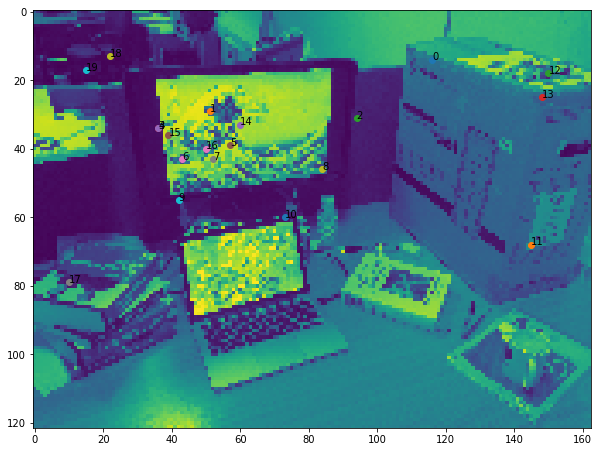

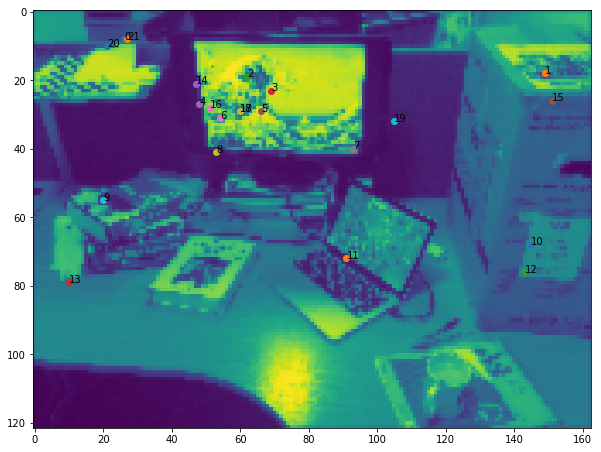

In [82]:
plt.figure(figsize=(10,10))
cnt = 0
plt.imshow(image)
for i in final_descriptor:
    for j in lst:
        if i in j:
            print(i)
            plt.text(i[1],i[0],str(cnt))
            plt.scatter(i[1],i[0])
            cnt+=1
cnt = 0            
plt.figure(figsize=(10,10))
plt.imshow(image_1)
for i in final_descriptor_:
    for j in lst:
        if i in j:
            print(i)
            plt.text(i[1],i[0],str(cnt))
            plt.scatter(i[1],i[0])
            cnt+=1

In [85]:
list_ = list(lst)

In [93]:
lst1 = []
lst2 = []
for i in range(len(list_)):
    lst1.append(list_[i][0])
for i in range(len(list_)):
    lst2.append(list_[i][1])
    

In [97]:
lst,lst1,lst2

({((34, 36), (21, 47)): 0.09922099962996146,
  ((34, 36), (27, 48)): 0.10075612106027193,
  ((33, 60), (23, 69)): 0.10293200885899056,
  ((40, 50), (29, 60)): 0.10530226660822858,
  ((13, 22), (8, 27)): 0.1088349658165633,
  ((39, 57), (29, 66)): 0.11549915920278078,
  ((43, 43), (31, 54)): 0.1155941587847703,
  ((36, 39), (28, 51)): 0.12157736030750792,
  ((31, 94), (32, 105)): 0.12366042166506638,
  ((29, 51), (19, 62)): 0.1238105355130986,
  ((17, 15), (10, 21)): 0.13284070962485764,
  ((18, 150), (18, 149)): 0.13489583746509043,
  ((55, 42), (41, 53)): 0.13827873721571898,
  ((60, 73), (8, 26)): 0.14188308783974965,
  ((46, 84), (40, 93)): 0.14211859925635997,
  ((79, 10), (55, 20)): 0.14236287315094773,
  ((68, 145), (76, 143)): 0.14477652496255344,
  ((25, 148), (26, 151)): 0.15351411373329021,
  ((14, 116), (72, 91)): 0.1538441338515038,
  ((43, 52), (29, 60)): 0.1540278309330939},
 [(34, 36),
  (34, 36),
  (33, 60),
  (40, 50),
  (13, 22),
  (39, 57),
  (43, 43),
  (36, 39),
  

(34, 36)
(34, 36)
(33, 60)
(40, 50)
(13, 22)
(39, 57)
(43, 43)
(36, 39)
(31, 94)
(29, 51)
(17, 15)
(18, 150)
(55, 42)
(60, 73)
(46, 84)
(79, 10)
(68, 145)
(25, 148)
(14, 116)
(43, 52)

(21, 47)
(27, 48)
(23, 69)
(29, 60)
(8, 27)
(29, 66)
(31, 54)
(28, 51)
(32, 105)
(19, 62)
(10, 21)
(18, 149)
(41, 53)
(8, 26)
(40, 93)
(55, 20)
(76, 143)
(26, 151)
(72, 91)
(29, 60)


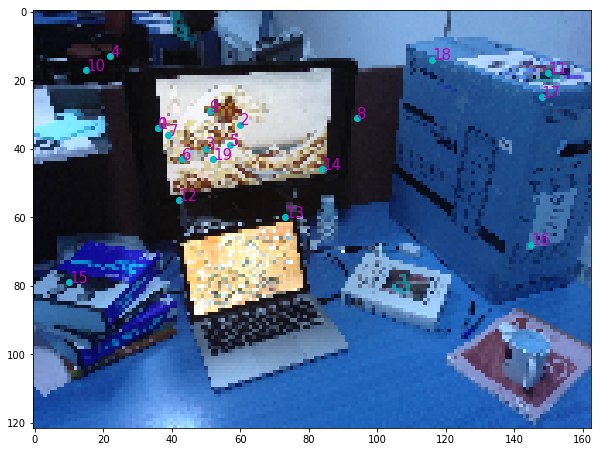

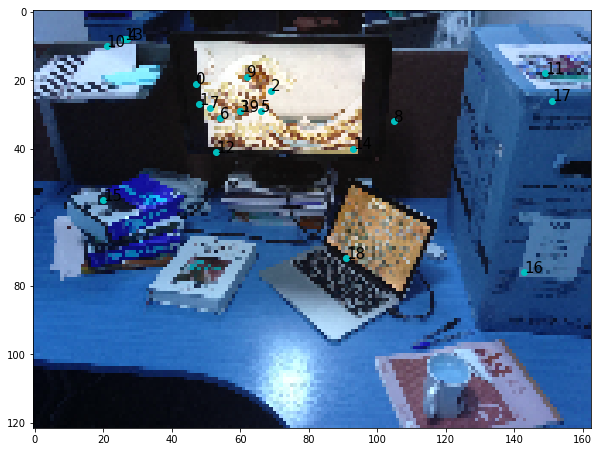

In [121]:
image = cv.imread('img1.jpg')
image = cv.resize(image,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)
image_1 = cv.imread('img2.jpg')
image_1 = cv.resize(image_1,None, fx = 0.05, fy =  0.05, interpolation = cv.INTER_CUBIC)

plt.figure(figsize=(10,10))
cnt = 0
plt.imshow(image)
for i in range(len(lst1)):
    plt.text(lst1[i][1],lst1[i][0],str(cnt),size = 15,color = 'm')
    plt.scatter(lst1[i][1],lst1[i][0],color='c')
    cnt+=1
    print(lst1[i])
cnt = 0      
plt.figure(figsize=(10,10))
plt.imshow(image_1)
print()
for i in range(len(lst2)):
    plt.text(lst2[i][1],lst2[i][0],str(cnt),size = 15)
    plt.scatter(lst2[i][1],lst2[i][0],color='c')
    cnt+=1
    print(lst2[i])
cnt = 0    

In [123]:
len(kplist[0][1])

198